## Epsilon greedy

#### Greedy Algorithms on bandit program design --------


##### Greedy Algorithm:
    While True:
        j = argmax(predicted bandit means)
        x = play bandit j and get reward
        bandit[j].update_mean(x)
        

##### Epsilon-Greedy:
    While True:
        p = Random number in [0, 1]
        if p < epsilon:
            j = choose a random bandit
        else:
            j = argmax(Predicted bandit means)
        x = play bandit j and get reward 
        bandits[j].update_mean(x)
 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random

In [19]:
### Epsilon greedy first implemation
class Bandit:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 0 # estimated probability
        self.N = 0 # Number of sample collected
    
    def pull(self):
        return np.random.random() < self.p
    
    def update(self, x):
        self.N += 1
        self.p_estimate = ((self.N -1) * self.p_estimate + x) / self.N       

In [22]:
BANDIT_PROBABILITY = [0.2, 0.8, 0.7, 0.3]
NUM_TRIALS = 1000
EPS = 0.1
# experiment 
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITY] # number of move we can 
    
    rewards = np.zeros(NUM_TRIALS)
    num_of_time_explore = 0
    num_of_time_exploited = 0
    num_optimal = 0
    optimal_move = np.argmax([b.p for b in bandits])
    
    print("Optiaml Move:", optimal_move)
    
    # EPSILON-GREEDY LOOP
    for i in range(NUM_TRIALS):
        # Use epsilon greedy to select next bandit
        if np.random.random() < EPS:
            num_of_time_explore += 1
            move = int(np.floor(random.sample(range(0, 4), 1))[0])
        else:
            num_of_time_exploited += 1
            move = int(np.floor(random.sample(range(0, 4), 1))[0])
        
        # Check if it is optimal move
        if move == optimal_move:
            num_optimal += 1
            
        # pull the arm of bandit
        x = bandits[move].pull()
        
        # Update rewards
        rewards[i] = x
        
        # Update distribution for the bandit whose arm just pull
        bandits[move].update(x)
        
    
    # Print final estimate of each bandits
    for b in bandits:
        print(b.p_estimate)
    
    # Print the rewards and moves
    print("Total Reward earnd:", rewards.sum())
    print("Win rate:", rewards.sum()/NUM_TRIALS)
    print("Number of time explore:",num_of_time_explore)
    print("Number of time exploited:",num_of_time_exploited)
    print("Number of time optimal pick optimal move:", num_optimal)
    
    # Plot the result
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    
    plt.figure(figsize=(5,5))
    plt.plot(win_rates, label='win rate')
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITY), label='trials')
    plt.legend(loc='upper right')
    plt.show()
    
        

Optiaml Move: 1
0.19213973799126643
0.7732793522267206
0.6692015209125475
0.2528735632183907
Total Reward earnd: 477.0
Win rate: 0.477
Number of time explore: 99
Number of time exploited: 901
Number of time optimal pick optimal move: 247


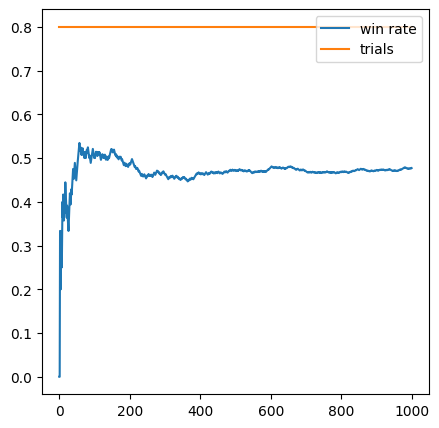

In [23]:
experiment()

### Epsilo-greedy difference approach

In [28]:
class BanditArm:
    def __init__(self, m):
        self.m = m
        self.m_estimate = 0
        self.N = 0
    
    def pull(self):
        return np.random.random() + self.m
    
    
    def update(self, x):
        self.N += 1
        self.m_estimate = (1 - 1.0/self.N)*self.m_estimate + 1.0 / self.N * x
        
def run_experiment(m1, m2, m3, eps, N):
    bandits = [BanditArm(m1), BanditArm(m2), BanditArm(m3)]
    
    # count number of suboptimal choices
    means = np.array([m1, m2, m3])
    true_best = np.argmax(means)
    count_suboptimal = 0
    
    data = np.empty(N)
    
    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(len(bandits))
        else:
            j = np.argmax([b.m_estimate for b in bandits])
        
        x = bandits[j].pull()
        bandits[j].update(x)
        
        if j == true_best:
            count_suboptimal += 1
        
        # reward
        data[i] = x
    
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    
    # Plot moveing average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    
    # print bandit esimate
    for b in bandits:
        print(b.m_estimate)
        
    print(f"Percent suboptimal for epsilon = {eps} % {float(count_suboptimal) / N}")
    
    return cumulative_average
    

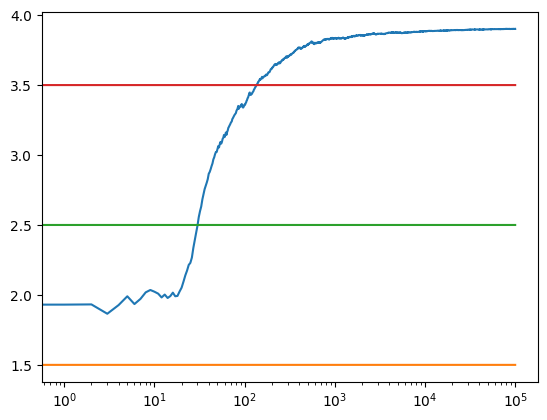

2.0131468788853577
2.9913430430726637
4.000715459959151
Percent suboptimal for epsilon = 0.1 % 0.93393


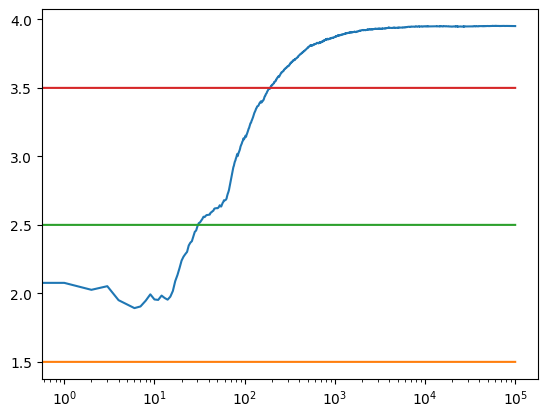

2.0213952305743943
3.011682633041368
4.000446651360863
Percent suboptimal for epsilon = 0.05 % 0.96645


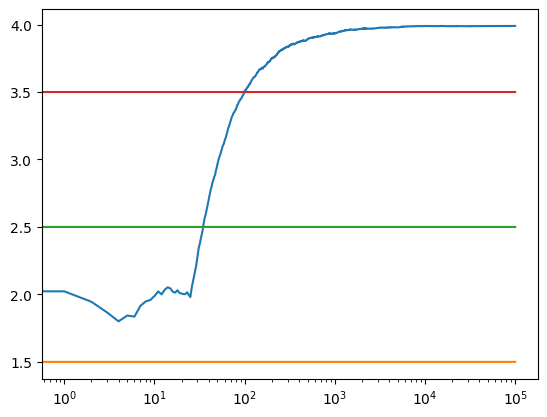

1.99092933201494
3.0045378265093965
3.9997582283155313
Percent suboptimal for epsilon = 0.01 % 0.99346


In [29]:
m1, m2, m3 = 1.5, 2.5, 3.5

c_1 = run_experiment(m1, m2, m3, 0.1, 100000)
c_2 = run_experiment(m1, m2, m3, 0.05, 100000)
c_3 = run_experiment(m1, m2, m3, 0.01, 100000)

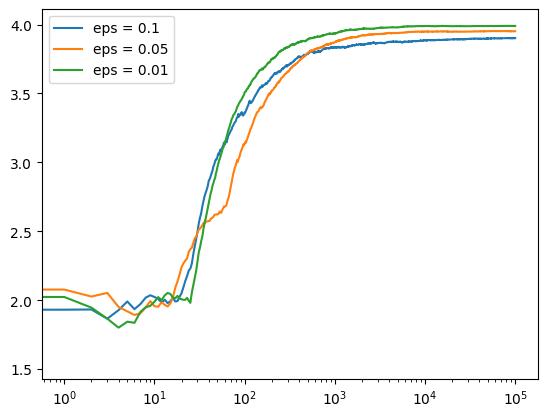

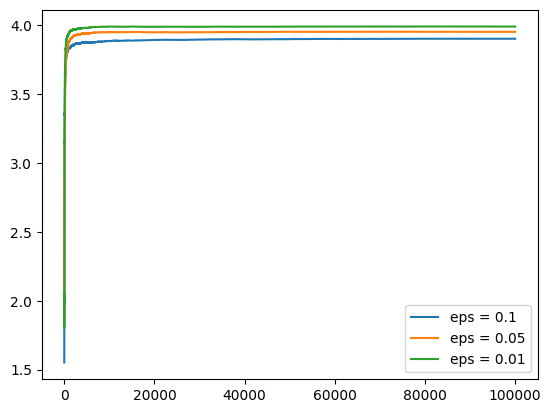

In [30]:
# log scale plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_2, label='eps = 0.05')
plt.plot(c_3, label='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()

# Linear plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_2, label='eps = 0.05')
plt.plot(c_3, label='eps = 0.01')
plt.legend()
plt.show()